In [1]:
import torch

梯度计算  y=f(x,y)=x**2 + x + 1

In [14]:
import torch
def func(x):
    return x**2+x+1

In [15]:
x = torch.tensor(1.0,requires_grad=True)

In [16]:
y = func(x)

计算y在x=1处的导数

In [17]:
y.backward()

In [18]:
x.grad

tensor(3.)

-------------------------------------

y=f(x,y) =x**2 +y**2

In [9]:
import torch
def func(x):
    return (x**2).sum()

In [10]:
x=torch.tensor([0.0,1.0],requires_grad=True)

In [11]:
y=func(x)

计算y在点x=（0,1）处两个分量的偏导数

In [12]:
y.backward()

In [13]:
x.grad

tensor([0., 2.])

自变量修改

In [23]:
import torch
x = torch.tensor(1.0,requires_grad=True)
y=x

In [24]:
y.backward()
x.grad

tensor(1.)

In [25]:
x = x - 0.1*3

In [26]:
x.grad

C:\Users\admin\AppData\Local\Temp/ipykernel_5424/3730140797.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  x.grad


---

禁用梯度

In [27]:
import torch
x = torch.tensor(1.0,requires_grad=True)
y=x

In [28]:
y.backward()
x.grad

tensor(1.)

In [29]:
x -= 0.1*3

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [30]:
print(x, x.grad)

tensor(1., requires_grad=True) tensor(1.)


In [31]:
with torch.no_grad():
    x -= 0.1*3

In [32]:
print(x,x.grad)

tensor(0.7000, requires_grad=True) tensor(1.)


---------------

梯度清零

In [34]:
import torch
x = torch.tensor(1.0,requires_grad=True)
y = x

In [35]:
y.backward()
x.grad

tensor(1.)

In [36]:
y.backward()
x.grad

tensor(2.)

In [37]:
x.grad.zero_()
y.backward()
x.grad

tensor(1.)

In [38]:
print(x,x.grad)

tensor(1., requires_grad=True) tensor(1.)


In [42]:
import torch

# 创建一个包含值为5的张量，这里形状为标量（即形状为空的张量）
x = torch.tensor(5.)

# 计算正弦值
result = torch.sin(x)

print(result)

tensor(-0.9589)


In [41]:
import numpy as np

result = np.sin(5)
print(result)

-0.9589242746631385


------------------

自动微分

In [44]:
import torch

# 定义自变量x1和x2，这里假设为具体的值，可根据需要修改
x1 = torch.tensor(2., requires_grad=True)
x2 = torch.tensor(5., requires_grad=True)

# 计算函数f(x1, x2)的值
f_value = torch.log(x1) + x1 * x2 - torch.sin(x2)

# 可以查看函数值
print("函数f(x1, x2)的值为:", f_value)

# 如果需要求关于x1和x2的偏导数
f_value.backward()

# 查看x1的偏导数
print("关于x1的偏导数:", x1.grad)

# 查看x2的偏导数
print("关于x2的偏导数:", x2.grad)

函数f(x1, x2)的值为: tensor(11.6521, grad_fn=<SubBackward0>)
关于x1的偏导数: tensor(5.5000)
关于x2的偏导数: tensor(1.7163)


In [59]:
import torch

In [64]:
def sin(x):
    return torch.sin(x)

In [65]:
v_1 = x1
v0 = x2
v1 = torch.log(x1)
v2 = v_1 * v0
v3 = sin(v0)
v4 = v1 + v2
v5 = v4 -v3

In [66]:
if x1.grad is not None:
    x1.grad.zero_()
if x2.grad is not None:
    x2.grad.zero_()
v0.backward(retain_graph=True)

---------------------

用torch实现自行实现sigmoif激活函数，并计算他在x=0点处的导数

In [55]:
import torch

# 自定义实现Sigmoid函数
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# 定义输入张量x，设置requires_grad=True以便计算导数
x = torch.tensor(0., requires_grad=True)

# 计算Sigmoid函数在x处的值
y = sigmoid(x)

# 计算Sigmoid函数在x处的导数
y.backward()

# 输出Sigmoid函数在x=0处的值和导数
print("Sigmoid函数在x=0处的值为:", y.item())
print("Sigmoid函数在x=0处的导数为:", x.grad.item())

Sigmoid函数在x=0处的值为: 0.5
Sigmoid函数在x=0处的导数为: 0.25


------------------

In [57]:
import torch


# 自定义实现Sigmoid函数
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))


def y_function(x1, x2):
    term1 = sigmoid(3 * sigmoid(x1 * x1 + 2 * x2 + 1))
    term2 = sigmoid(x1 * x1 + 2 * x2 + 1)
    return term1 + term2 + 1


# 定义自变量x1和x2，这里假设为具体的值，可根据需要修改
x1 = torch.tensor(2., requires_grad=True)
x2 = torch.tensor(5., requires_grad=True)

# 计算y_function在x1和x2处的值
y = y_function(x1, x2)

# 计算y_function在x1和x2处的导数
y.backward()

# 输出y_function在给定x1和x2处的值和导数
print("y_function的值为:", y.item())
print("x1的导数为:", x1.grad.item())
print("x2的导数为:", x2.grad.item())

y_function的值为: 2.952573776245117
x1的导数为: 1.3894440371586825e-06
x2的导数为: 6.947220754227601e-07


------------------

In [7]:
import pandas as pd
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as pltLL

In [10]:
data = {
    '真实标签':[1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0],
    '预测分数':[0.9,0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.30,0.1]
}
df = pd.DataFrame(data)
df.head(10)

,真实标签,预测分数
0,1,0.900
1,1,0.800
2,0,0.700
3,1,0.600
4,1,0.550
5,1,0.540
6,0,0.530
7,0,0.520
8,1,0.510
9,0,0.505


In [12]:
df_sorted = df.sort_values(by = '预测分数',ascending = False)

cumulative_tp = df_sorted['真实标签'].cumsum()
cumulative_fp = (1 - df_sorted['真实标签']).cumsum()

total_tp = cumulative_tp.iloc[-1]
total_fp = cumulative_fp.iloc[-1]

fpr = cumulative_fp / total_fp
tpr = cumulative_tp / total_tp

roc_auc = auc(fpr,tpr)
print(roc_auc)

0.68


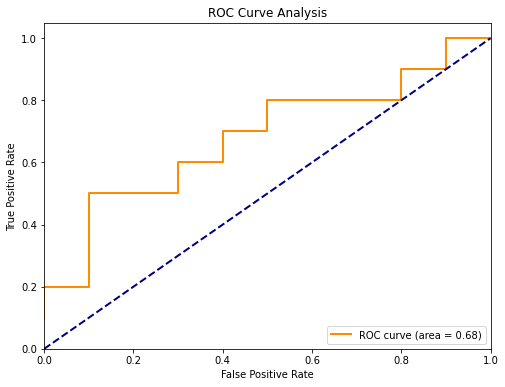

In [14]:
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='darkorange',lw = 2,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Analysis')
plt.legend(loc='lower right')
# 显示绘制好的图形
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X = iris.data
y = iris.target

classifier = RandomForestClassifier(n_estimators=100,random_state=42)

kf = KFold(n_splits=5,shuffle=True,random_state=42)

scores = cross_val_score(classifier,X,y,cv = kf)

print(f'每一折的得分：{scores}')
print(f'平均得分:{scores.mean()}')

import matplotlib.pyplot as plt

folds = list(range(1,len(scores) + 1)
plt. plot(folds,scores,mar

每一折的得分：[1.         0.96666667 0.93333333 0.93333333 0.96666667]
平均得分:0.9600000000000002


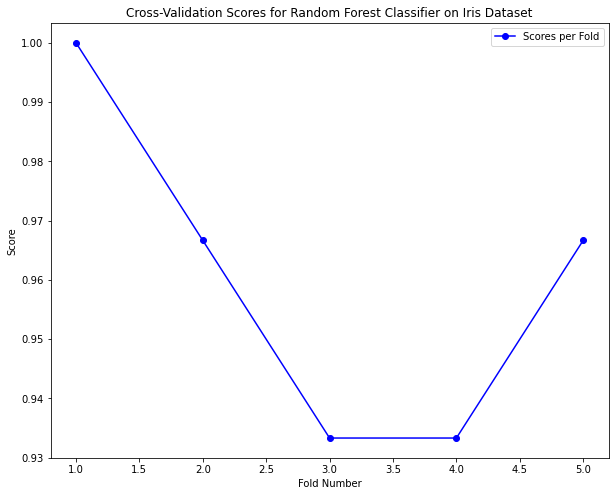

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 创建随机森林分类器，设置估计器数量为100，随机种子为42
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 创建KFold对象，设置折数为5，打乱数据顺序，随机种子为42
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 进行交叉验证，得到每折的得分
scores = cross_val_score(classifier, X, y, cv=kf)

# 打印每一折的得分和平均得分
print(f'每一折的得分：{scores}')
print(f'平均得分:{scores.mean()}')

import matplotlib.pyplot as plt

# 创建表示折数的列表，从1到得分列表的长度（即折数）
folds = list(range(1, len(scores) + 1))
plt.figure(figsize=(10,8))
# 绘制每折得分的折线图
# 这里修正了原代码中可能遗漏的参数设置，比如添加了线条颜色、标记等设置以便图形更清晰
plt.plot(folds, scores, marker='o', color='blue', linewidth=1.5, label='Scores per Fold')

# 设置x轴标签
plt.xlabel('Fold Number')

# 设置y轴标签
plt.ylabel('Score')

# 设置图形标题
plt.title('Cross-Validation Scores for Random Forest Classifier on Iris Dataset')

# 显示图例
plt.legend()

# 显示图形
plt.show()

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = np.array([[50],[70],[82],[101],[120]])

y = np.array([300,500,610,702,800])

model = LinearRegression()

model.fit(X,y)

slope = model.coef_
intercept = model.intercept_

print(f'斜率（权重）：{slope[0]}')
print(f'截距（偏置）: {intercept}')

斜率（权重）：6.997414262384324
截距（偏置）: -9.581246597713744


预测的价格:
340.28946652150245
480.23775176918895
564.2067229178008
697.157593903103
830.1084648884051


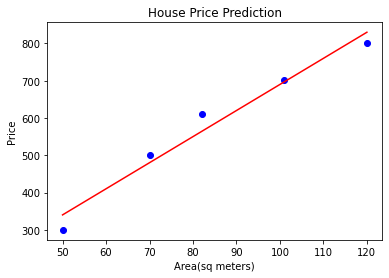

In [24]:
predictions = model.predict(X)

print('预测的价格:')

for pred in predictions:
    print(pred)

plt.scatter(X,y,color='blue')
plt.plot(X,predictions,color='red')
plt.title('House Price Prediction')
plt.xlabel('Area(sq meters)')
plt.ylabel('Price')
plt.show()